# Project on Automobile Dataset

In [115]:
#Importing Libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [116]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [117]:
df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [118]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [119]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [121]:
#cal Mean for normalized-losses,bore,stroke,horsepower,peak-rpm
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

avg_stroke=df["stroke"].astype("float").mean(axis=0)
print("average_stroke_value:",avg_stroke)

avg_horsepower = df["horsepower"].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810957
average_stroke_value: 3.2554228855721337
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [122]:
# Replace "NaN" by mean value in "normalized-losses","bore","stroke","horsepower","peakrpm" column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan,avg_stroke, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [123]:
#To find common number of doors in cars
df['num-of-doors'].value_counts().idxmax()

'four'

In [124]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

# Drop whole row with NaN in "price" column since it doesnot affect the result
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [125]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h4> Convert data types to proper format </h4>

In [126]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [127]:
# Convert data to correct format 
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [128]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [129]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,0,1


In [130]:
#develop a model using these variables as the predictor variables.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print('Intercept:',lm.intercept_ ,  'Coefficients:',lm.coef_)


Intercept: -15811.863767729243 Coefficients: [53.53022809  4.70805253 81.51280006 36.1593925 ]


In [131]:
Yhat = lm.predict(Z)
plt.figure(figsize=(width, height))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

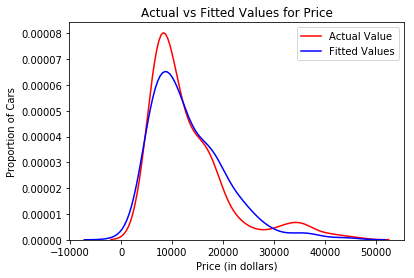

In [132]:
import seaborn as sns
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [133]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


In [134]:
# save the new csv
df.to_csv('clean_df.csv')